In [4]:
import numpy as np
from numpy import linalg

################################################################################
# Function: idempotents                                                        #
#                                                                              #
# Purpose: find principal idempotents of a Hermitian matrix                    #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#                                                                              #
# Returns: principal idempotents, eigenvalues                                  #
#                                                                              #
################################################################################

def idempotents(A):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    # Extracts eigenvalues and eigenvectors
    W,V = linalg.eigh(A)
    # Converts eigenvectors into orthonormal basis
    Q, R = linalg.qr(V) 
    Q = matrix(Q)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    idems = []
    evals = []
    i = 0
    j = 0
    while i < n:
        # Zero matrix
        E = matrix(n, n, 0)
        # Checks if eigenvectors share an eigenvalue
        while j < n and abs(W[i] - W[j]) < 0.01:
            # Converts eigenvector into column vecror
            v = Q.column(j).column()
            # Updates idempotent
            E = E + v*v.conjugate_transpose();
            j = j + 1
        E = E
        idems.append(E)
        evals.append(W[i].round(3))
        i = j
    return idems, evals

In [5]:
################################################################################
# Function: transfer                                                           #
#                                                                              #
# Purpose: return transfer matrix U(t) given adjacency matrix/Hamiltonian      #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   t        float                              time                           #
#   k        integer                            rounding accuracy              #
#                                                                              #
# Returns: transfer U(t)                                                       #
#                                                                              #
################################################################################

def transfer(A, t):
    if not matrix(A).is_hermitian():
        print("A is not Hermitian")
        return []
    idems, evals = idempotents(A)
    # Number of eigenvectors
    A = np.matrix(A)
    n = len(A)
    # Zero matrix
    U = matrix(n, n, 0)
    for i in range(len(idems)):
        # Updates transder matrix
        U = U + exp(I*t*evals[i])*idems[i]
    return U      

In [6]:
# Example usage for C6
AC6 = matrix([[0,0,1,0,0,1],[0,0,0,1,1,0],[1,0,0,0,1,0],[0,1,0,0,0,1],[0,1,1,0,0,0],[1,0,0,1,0,0]])
EAC6, lAC6 = idempotents(AC6)
for i in range(len(lAC6)):
    print("Idempotent for", int(lAC6[i]))
    print(EAC6[i].round(3))

Idempotent for -2
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167 -0.167  0.167  0.167 -0.167]
[-0.167  0.167  0.167 -0.167 -0.167  0.167]
Idempotent for -1
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[ 0.333  0.333 -0.167 -0.167 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167  0.333  0.333 -0.167 -0.167]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
[-0.167 -0.167 -0.167 -0.167  0.333  0.333]
Idempotent for 1
[ 0.333 -0.333  0.167 -0.167 -0.167  0.167]
[-0.333  0.333 -0.167  0.167  0.167 -0.167]
[ 0.167 -0.167  0.333 -0.333  0.167 -0.167]
[-0.167  0.167 -0.333  0.333 -0.167  0.167]
[-0.167  0.167  0.167 -0.167  0.333 -0.333]
[ 0.167 -0.167 -0.167  0.167 -0.333  0.333]
Idempotent for 2
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167 0.167 0.167]
[0.167 0.167 0.167 0.167

In [7]:
UAC6 = transfer(AC6,np.pi); UAC6

[                               -0.3333333333333336  -2.7755575615628914e-17 - 1.632862398863138e-16*I   8.326672684688674e-17 - 4.0821559971578444e-17*I      0.6666666666666669 + 4.3140830754274083e-32*I       0.6666666666666666 + 3.697785493223493e-32*I   -2.220446049250313e-16 - 4.082155997157843e-17*I]
[ -2.7755575615628914e-17 - 1.632862398863138e-16*I     -0.33333333333333315 + 1.232595164407831e-32*I       0.6666666666666669 - 6.162975822039155e-33*I  1.1102230246251565e-16 - 4.0821559971578475e-17*I   1.1102230246251565e-16 - 4.082155997157848e-17*I       0.6666666666666667 + 6.162975822039155e-33*I]
[  8.326672684688674e-17 - 4.0821559971578444e-17*I       0.6666666666666669 - 6.162975822039155e-33*I     -0.33333333333333315 + 1.232595164407831e-32*I -2.7755575615628914e-17 - 1.6328623988631378e-16*I -1.3877787807814457e-16 - 4.0821559971578457e-17*I      0.6666666666666665 + 3.0814879110195774e-32*I]
[     0.6666666666666669 + 4.3140830754274083e-32*I  1.1102230246251565e-16 

In [8]:
# Example usage for C5
AC5 = matrix([[0,1,0,0,1],[1,0,1,0,0],[0,1,0,1,0],[0,0,1,0,1],[1,0,0,1,0]]); AC5

[0 1 0 0 1]
[1 0 1 0 0]
[0 1 0 1 0]
[0 0 1 0 1]
[1 0 0 1 0]

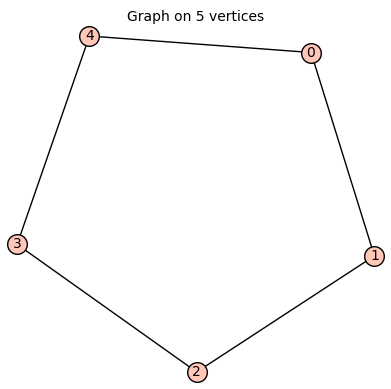

In [9]:
Graph(AC5)

In [10]:
UAC5 = transfer(AC5,np.pi); UAC5

[  0.20000000000000004 + 0.745656889966569*I 0.03798553069499458 - 0.18641422249164247*I 0.36201446930500575 - 0.18641422249164236*I   0.3620144693050057 - 0.1864142224916424*I 0.03798553069499436 - 0.18641422249164225*I]
[0.03798553069499458 - 0.18641422249164247*I   0.20000000000000015 + 0.745656889966569*I 0.03798553069499469 - 0.18641422249164236*I  0.3620144693050059 - 0.18641422249164247*I  0.3620144693050059 - 0.18641422249164216*I]
[0.36201446930500575 - 0.18641422249164236*I 0.03798553069499469 - 0.18641422249164236*I  0.20000000000000012 + 0.7456568899665692*I 0.03798553069499441 - 0.18641422249164197*I  0.3620144693050058 - 0.18641422249164225*I]
[  0.3620144693050057 - 0.1864142224916424*I  0.3620144693050059 - 0.18641422249164247*I 0.03798553069499441 - 0.18641422249164197*I  0.19999999999999993 + 0.7456568899665692*I  0.03798553069499472 - 0.1864142224916424*I]
[0.03798553069499436 - 0.18641422249164225*I  0.3620144693050059 - 0.18641422249164216*I  0.3620144693050058 - 0

In [11]:
# Example usage for C4
AC4 = matrix([[0, 0, 1, 1],[0, 0, 1, 1],[1, 1, 0, 0],[1, 1, 0, 0]]); AC4

[0 0 1 1]
[0 0 1 1]
[1 1 0 0]
[1 1 0 0]

In [12]:
EAC4, lAC4 = idempotents(AC4)
for i in range(len(lAC4)):
    print("Idempotent for", int(lAC4[i]))
    print(EAC4[i].round(5))

Idempotent for -2
[ 0.25  0.25 -0.25 -0.25]
[ 0.25  0.25 -0.25 -0.25]
[-0.25 -0.25  0.25  0.25]
[-0.25 -0.25  0.25  0.25]
Idempotent for 0
[ 0.5 -0.5  0.0 -0.0]
[-0.5  0.5  0.0 -0.0]
[ 0.0  0.0  0.5 -0.5]
[-0.0 -0.0 -0.5  0.5]
Idempotent for 2
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]


In [13]:
################################################################################
# Function: transfer_at_time_r                                                 #
#                                                                              #
# Purpose: find real part of transfer matrix at specific time and index        #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: real part of U(t) at index [i][j]                                   #
#                                                                              #
################################################################################

def transfer_at_time_r(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].real() < 0.00001:
        return 0
    return U[i][j].real()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_i(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].imag() < 0.00001:
        return 0
    return U[i][j].imag()

################################################################################
# Function: transfer_at_time_a                                                 #
#                                                                              #
# Purpose: find absolute value of transfer matrix at specific time and index   #
#                                                                              #
# Arguments:                                                                   #
#   A        Hermitian sage or numpy matrix     adjacency matrix/Hamiltonian   #
#   i        integer                            row number                     #
#   j        integer                            column number                  #
#                                                                              #
# Returns: absolute value of U(t) at index [i][j]                              #
#                                                                              #
################################################################################

def transfer_at_time_a(A,t,i,j):
    U = transfer(A,t)
    if U[i][j].abs() < 0.00001:
        return 0
    return U[i][j].abs()

In [14]:
# Example usage for directed C4 matrix
DC4 = np.matrix([[0,-1j,0,1j],[1j, 0, -1j, 0],[0,1j,0,-1j],[-1j,0,1j,0]]); matrix(DC4)

[   0.0 -1.0*I    0.0  1.0*I]
[ 1.0*I    0.0 -1.0*I    0.0]
[   0.0  1.0*I    0.0 -1.0*I]
[-1.0*I    0.0  1.0*I    0.0]

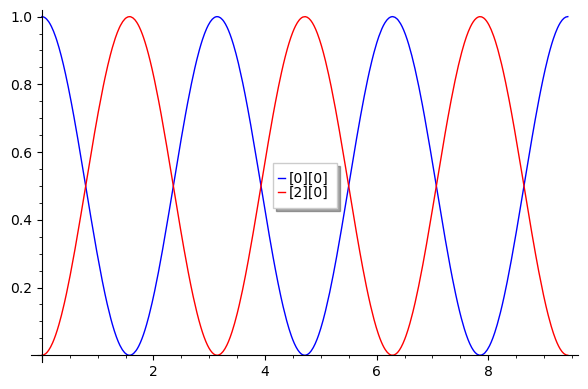

In [15]:
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [0][0]
PDC400 = plot(transfer_at_time_r(DC4,x,0,0),0,3*np.pi, legend_label="[0][0]")
# Plots real part of U(t) for matrix DC4 from time 0 to 3pi at entry [2][0]
PDC420 = plot(transfer_at_time_r(DC4,x,2,0),0,3*np.pi, color="red", legend_label="[2][0]")
PDC400 + PDC420

In [33]:
#idems is a list of idempotents
#a,b are vertices that we check
def parallel(a,b,idems):
    for M in idems:
        va = M[a].conjugate()
        vb = M[b]
        anorm=np.sqrt(M[a].dot_product(va))
        bnorm=np.sqrt(M[b].dot_product(M[b].conjugate()))
        print(va)
        print(vb)
        print(anorm)
        print(bnorm)
        print(va.dot_product(vb))
        print(abs(va.dot_product(vb))-anorm*bnorm)
        if abs(abs(va.dot_product(vb))-anorm*bnorm)>0.0001:
            return False
    return True


In [17]:
#idems is a list of idempotents
#a,b are vertices that we check
def cospec(a,b,idems):
    for M in idems:
        if abs(M[a,a]- M[b,b])>0.001:
            print(M[a,a])
            print(M[b,b])
            return False
    return True
def strcospec(a,b,idems):
    if cospec(a,b,idems) == True and parallel(a,b,idems) == True:
        return True
    else:
        return False
        

In [18]:
# Example usage for simple Hermitian matrix
H = np.matrix([[0,1j],[-1j,0]]); matrix(H)

[   0.0  1.0*I]
[-1.0*I    0.0]

In [19]:
EH, lH = idempotents(H);
for i in range(len(lH)):
    print("Idempotent for", int(lH[i]))
    print(EH[i].round(5))

Idempotent for -1
[   0.5 -0.5*I]
[ 0.5*I    0.5]
Idempotent for 1
[   0.5  0.5*I]
[-0.5*I    0.5]


In [20]:
# Plots absolute value of U(t) for matrix H from time 0 to 3pi
PH00a = plot(transfer_at_time_a(H,x,0,0),0,3*np.pi)
PH01a = plot(transfer_at_time_a(H,x,0,1),0,3*np.pi)
PH10a = plot(transfer_at_time_a(H,x,1,0),0,3*np.pi)
PH11a = plot(transfer_at_time_a(H,x,1,1),0,3*np.pi)

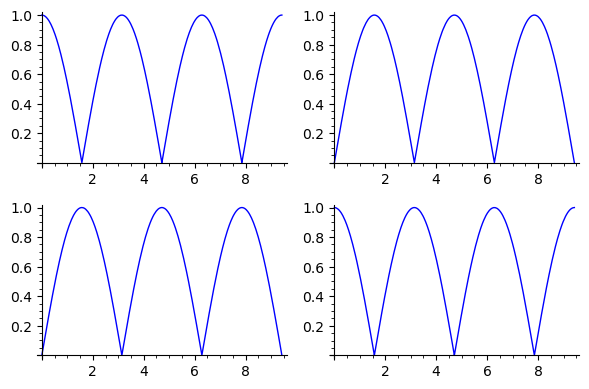

In [21]:
graphics_array(((PH00a,PH01a), (PH10a,PH11a)))

In [22]:
# Plots real part of U(t) for matrix H from time 0 to 3pi
PH00r = plot(transfer_at_time_r(H,x,0,0),0,3*np.pi)
PH01r = plot(transfer_at_time_r(H,x,0,1),0,3*np.pi)
PH10r = plot(transfer_at_time_r(H,x,1,0),0,3*np.pi)
PH11r = plot(transfer_at_time_r(H,x,1,1),0,3*np.pi)

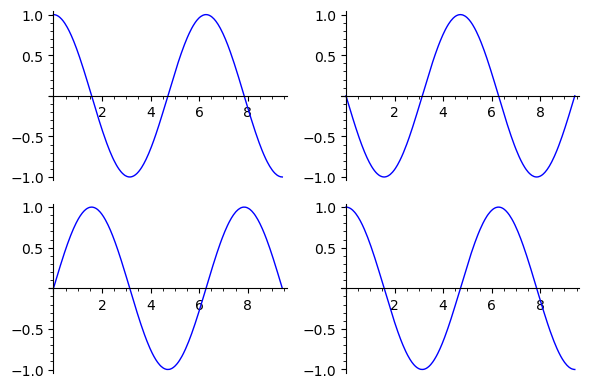

In [23]:
graphics_array(((PH00r,PH01r), (PH10r,PH11r)))

In [24]:
# Plots imaginary part of U(t) for matrix H from time 0 to 3pi
PH00i = plot(transfer_at_time_i(H,x,0,0),0,3*np.pi)
PH01i = plot(transfer_at_time_i(H,x,0,1),0,3*np.pi)
PH10i = plot(transfer_at_time_i(H,x,1,0),0,3*np.pi)
PH11i = plot(transfer_at_time_i(H,x,1,1),0,3*np.pi)

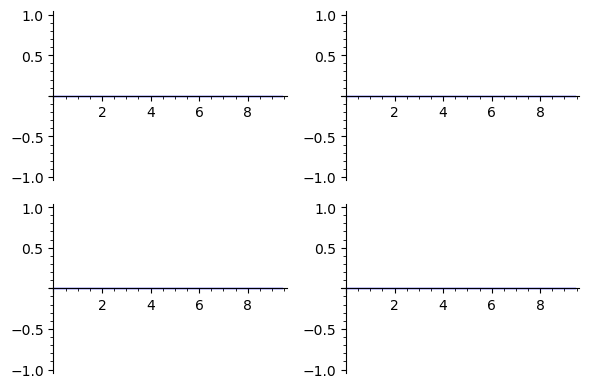

In [25]:
graphics_array(((PH00i,PH01i), (PH10i,PH11i)))

In [26]:
strcospec(0,1,EH)

(0.4999999999999999, 0.4999999999999999*I)
(0.4999999999999999*I, 0.4999999999999999)
0.4999999999999998*I
0.25


False

In [27]:
cospec(0,1,EH)

True

In [34]:
parallel(0,1,EH)

(0.4999999999999999, 0.4999999999999999*I)
(0.4999999999999999*I, 0.4999999999999999)
(0.7071067811865474+0j)
(0.7071067811865474+0j)
0.4999999999999998*I
0j
(0.4999999999999999, -0.5*I)
(-0.5*I, 0.5000000000000001)
(0.7071067811865475+0j)
(0.7071067811865476+0j)
-0.5*I
0j


True